# Sparsity in activations and gradients for VGG16

In [42]:
% matplotlib inline

import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

log_path = '/home/rbodo/.snntoolbox/data/imagenet/vgg16_trained/logs'
log_files = os.listdir(log_path)

batch_size = 8

In [161]:
plotproperties = {'font.size': 10,
                  'axes.titlesize': 'large',
                  'axes.labelsize': 'large',
                  'xtick.labelsize': 'large',
                  'xtick.major.size': 2,
                  'xtick.minor.size': 1,
                  'ytick.labelsize': 'large',
                  'ytick.major.size': 2,
                  'ytick.minor.size': 1,
                  'legend.fontsize': 'large',
                  'figure.figsize': (3, 2),
                  'savefig.dpi': 300,
                  'savefig.format': 'jpg'}

import matplotlib as mpl
mpl.rcParams.update(plotproperties)

In [43]:
def get_sparsity(hist):
    i_min = np.nonzero(np.array(hist.bucket_limit) > 0)[0][0]
    return hist.bucket[i_min] / hist.num

In [44]:
data = tf.train.summary_iterator(os.path.join(log_path, log_files[0]))
for _ in range(4):
    e = data.__next__()

In [119]:
grad = e.summary.value[113]
v = grad.histo
grad.tag

'predictions/kernel_0_grad'

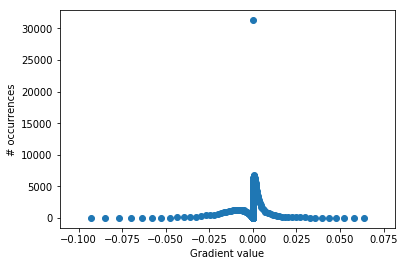

In [120]:
plt.scatter(v.bucket_limit, v.bucket)
plt.xlabel('Gradient value')
plt.ylabel('# occurrences')
plt.savefig(os.path.join(log_path, 'gradient_distribution16'), bbox_inches='tight')

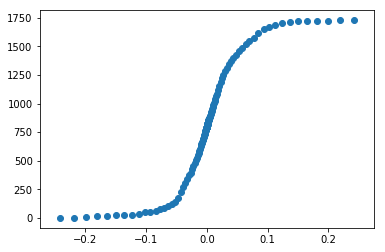

In [22]:
plt.scatter(v.bucket_limit, np.cumsum(v.bucket))

[-8.859221300957652e-05, -7.321670496659217e-05, -6.656064087872014e-05, -6.050967352610922e-05, -5.500879411464474e-05, 6.143280789206572e-06, 6.757608868127229e-06, 9.745143431053419e-05, 0.00010719657774158762, 0.00012970785906732103]
[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0]


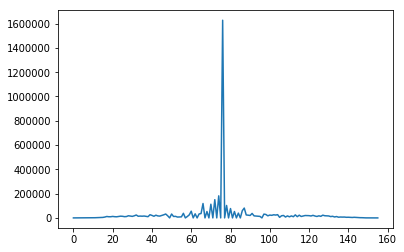

In [23]:
pdf = np.diff(np.cumsum(v.bucket))/np.ediff1d(v.bucket_limit)
plt.plot(pdf)
idx = np.argmax(pdf)
print(v.bucket_limit[idx-5:idx+5])
print(v.bucket[idx-5:idx+5])

In [24]:
pdf[idx]/np.sum(pdf)

0.37196759736888579

In [25]:
gradients_e[grad.tag]

NameError: name 'gradients_e' is not defined

In [44]:
activations_e[grad.tag]

[0.53049288720500709, 0.5272783649211028]

In [121]:
data = tf.train.summary_iterator(os.path.join(log_path, log_files[0]))

activations = {}
gradients = {}
gradient_sparsity = {}
for e in data:
    for v in e.summary.value:
        if 'out' in v.tag:
            label = v.tag
            if not label in activations.keys():
                activations[label] = []
            activations[label].append(get_sparsity(v.histo))
        elif '_grad_sparsity' in v.tag:
            label = v.tag
            if not label in gradient_sparsity.keys():
                gradient_sparsity[label] = []
            gradient_sparsity[label].append(v.simple_value)
        elif 'grad' in v.tag:
            label = v.tag
            if not label in gradients.keys():
                gradients[label] = []
            gradients[label].append(get_sparsity(v.histo))

In [122]:
num_epochs = int(len(list(activations.values())[0]) / batch_size / 4)
activations_e = {}
for key, value in activations.items():
    activations_e[key] = [value[4*batch_size*(i+1)-1] for i in range(num_epochs)]

gradients_e = {}
for key, value in gradients.items():
    gradients_e[key] = [value[4*batch_size*(i+1)-1] for i in range(num_epochs)]

gradient_sparsity_e = {}
for key, value in gradient_sparsity.items():
    gradient_sparsity_e[key] = [value[4*batch_size*(i+1)-1] for i in range(num_epochs)]

In [166]:
def plot_sparsity(data_dict, title):
    for label, value in data_dict.items():
        plt.plot(np.array(value) * 100, '.', label=label[:-4])
    #plt.legend(loc='right')
    #plt.title('Sparsity in activations of VGG16')
    plt.xlabel('Epoch')
    plt.ylabel('Sparsity [%]')
    plt.ylim(0, 100)
    plt.savefig(os.path.join(log_path, title), bbox_inches='tight')

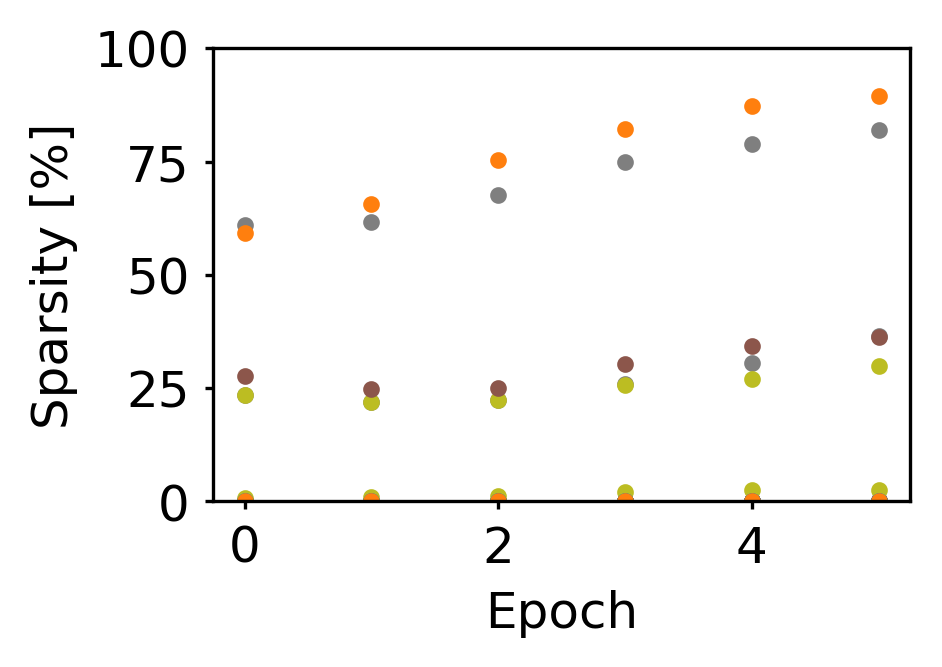

In [167]:
plot_sparsity(gradients_e, 'gradient_sparsity')

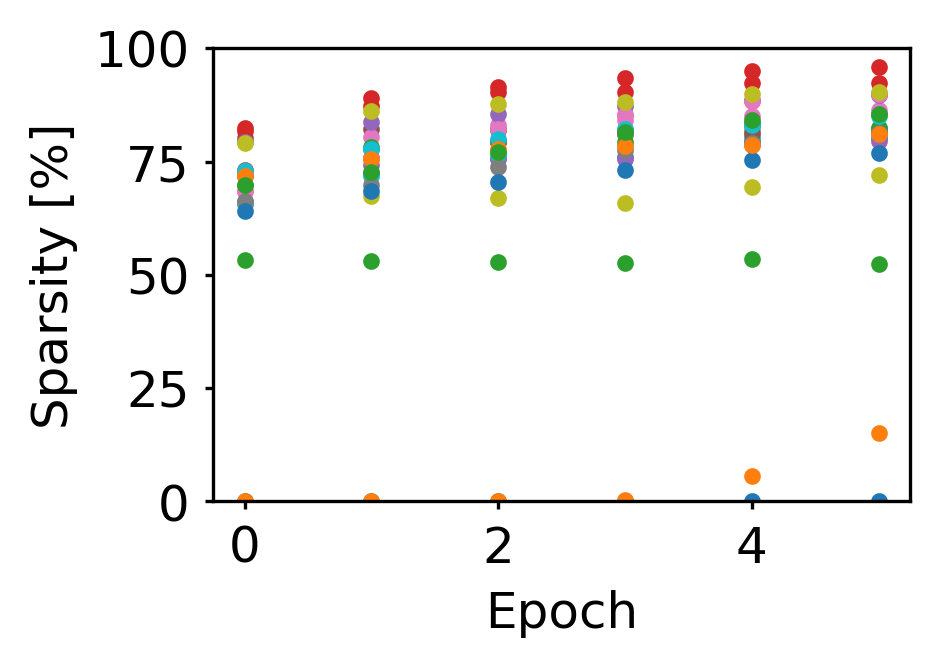

In [163]:
plot_sparsity(activations_e, 'activation_sparsity')

In [52]:
g = gradient_sparsity['fc2/kernel_0_grad_sparsity']

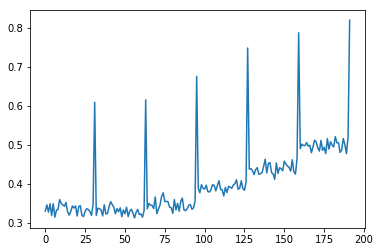

In [53]:
plt.plot(g)

In [61]:
[g[32*i + 31] for i in range(6)]

[0.6097261309623718,
 0.6157556176185608,
 0.6760637164115906,
 0.7488633990287781,
 0.7879457473754883,
 0.8201060891151428]